In [3]:
from vehicle_detection_utils import *
import cv2
# import glob
import time
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import pickle
import warnings

%matplotlib inline

### Load the dataset

In [ ]:
# load images into two lists
car_path = './dataset/vehicles/'
noncar_path = './dataset/non-vehicles/'
cars = load_data(car_path)
noncars = load_data(noncar_path)

### Exploratory analysis

In [ ]:
# print statistics of the images
data_summary = data_look(cars, noncars)
print(data_summary)

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(cars[0],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(cars[1],cv2.COLOR_BGR2RGB))

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(noncars[0],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(noncars[1],cv2.COLOR_BGR2RGB))

plt.tight_layout()
fig.savefig('./output_images/first_2_images.png')

### Color histograms

In [ ]:
nbins = 48
bins_range = (0,256)

In [ ]:
fig = plt.figure(figsize=(16,8))

for i,image in enumerate(cars[0:2]):
    
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins, bins_range)
    
    plt.subplot(2,4,i*4+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
#     plt.xlim(0, 256)
#     plt.title('test image {:d}'.format(i+1))
    plt.subplot(2,4,i*4+2)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
#     plt.title('R Histogram')
    plt.subplot(2,4,i*4+3)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
#     plt.title('G Histogram')
    plt.subplot(2,4,i*4+4)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
#     plt.title('B Histogram')
    
fig.tight_layout()
fig.savefig('./output_images/first_2_cars_CHist.png', dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=(16,8))

for i,image in enumerate(noncars[0:2]):
    
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins, bins_range)
    
    plt.subplot(2,4,i*4+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.subplot(2,4,i*4+2)
    plt.bar(bincen, rh[0])
#     plt.xlim(0, 256)
    plt.subplot(2,4,i*4+3)
    plt.bar(bincen, gh[0])
#     plt.xlim(0, 256)
    plt.subplot(2,4,i*4+4)
    plt.bar(bincen, bh[0])
#     plt.xlim(0, 256)
    
fig.tight_layout()
fig.savefig('./output_images/first_2_noncars_CHist.png', dpi=fig.dpi)

### Histogram of Gradients

In [ ]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

In [ ]:
fig = plt.figure(figsize=(8,8))

for i,image in enumerate(cars[0:2]):
    
    gray = BGR2GRAY(image)
    features, hog_gray = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
    plt.subplot(2,2,i*2+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    plt.subplot(2,2,i*2+2)
    plt.imshow(hog_gray,cmap = 'gray')
    
fig.tight_layout()
fig.savefig('./output_images/first_2_cars_HOG.png', dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=(8,8))

for i,image in enumerate(noncars[0:2]):
    
    gray = BGR2GRAY(image)
    features, hog_gray = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        
    plt.subplot(2,2,i*2+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    plt.subplot(2,2,i*2+2)
    plt.imshow(hog_gray,cmap = 'gray')
    
fig.tight_layout()
fig.savefig('./output_images/first_2_noncars_HOG.png', dpi=fig.dpi)

### Combining features

In [ ]:
cspace = 'YUV'
spatial_size = (32,32)
hist_bins = 32
hist_range = (0,256)
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'

In [ ]:
# generate X for the first two cars and noncars images for demonstration
car_features = extract_features(cars[0:2], cspace, spatial_size,
                        hist_bins, hist_range,
                        orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True, hog_channel=hog_channel)
notcar_features = extract_features(noncars[0:2], cspace, spatial_size,
                        hist_bins, hist_range,
                        orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True, hog_channel=hog_channel)
X = createX([car_features, notcar_features], normalize = False)
scaled_X, X_scaler = createX([car_features, notcar_features], normalize = True)
# generate labels
y = createY(car_features, notcar_features)

In [ ]:
fig = plt.figure(figsize=(18,8))

for i,image in enumerate(cars[0:2]):
    
#     features, hog_image = get_hog_features(image[:,:,0], orient, 
#                         pix_per_cell, cell_per_block, 
#                         vis=True, feature_vec=False)
        
    plt.subplot(2,3,i*3+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    plt.subplot(2,3,i*3+2)
    plt.plot(X[i,:])
    
    plt.subplot(2,3,i*3+3)
    plt.plot(scaled_X[i,:])
    
fig.tight_layout()
fig.savefig('./output_images/first_2_cars_features.png', dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=(18,8))

for i,image in enumerate(noncars[0:2]):
    
#     features, hog_image = get_hog_features(image[:,:,0], orient, 
#                         pix_per_cell, cell_per_block, 
#                         vis=True, feature_vec=False)
        
    plt.subplot(2,3,i*3+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    plt.subplot(2,3,i*3+2)
    plt.plot(X[i+2,:])
    
    plt.subplot(2,3,i*3+3)
    plt.plot(scaled_X[i+2,:])
    
fig.tight_layout()
fig.savefig('./output_images/first_2_noncars_features.png', dpi=fig.dpi)

### Sliding windows

In [329]:
x_start_stop=[None, None]
y_start_stop=[400, None]
xy_window=(128, 128)
xy_overlap=(0.5, 0.5)
test_file = './test_images/test1.jpg'
test_image = cv2.imread(test_file)

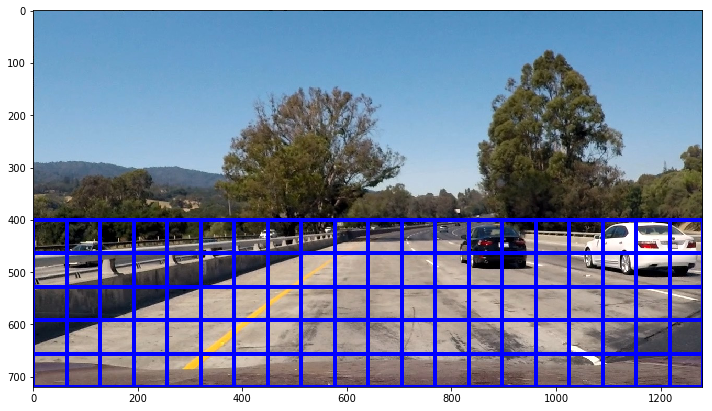

In [330]:
fig = plt.figure(figsize = (10,6))
windows = slide_window(test_image, x_start_stop, y_start_stop, xy_window, xy_overlap)
                       
window_img = draw_boxes(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB), windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img);

fig.tight_layout()
fig.savefig('./output_images/test1_sliding_windows.png', dpi=fig.dpi)

### Search and classify

In [331]:
from vehicle_detection_utils import *
import cv2
# import glob
import time
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import pickle
import warnings

%matplotlib inline

In [332]:
#color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#orient = 9  # HOG orientations
#pix_per_cell = 8 # HOG pixels per cell
#cell_per_block = 2 # HOG cells per block
#hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
#spatial_size = (32, 32) # Spatial binning dimensions
#hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()
xy_window = (64,64)
xy_overlap = (0.6,0.6)

test_files = './test_images/'
test_image = load_data(test_files,img_type = 'jpg')[0]
# load the svc classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = pickle.load( open("svc-clf.sav", "rb" ) )
    
clf = models[0].best_estimator_
X_scaler = models[1]
cspace = models[2]
spatial_size = models[3]
hist_bins = models[4]
hist_range = models[5]
orient = models[6]
pix_per_cell = models[7]
cell_per_block = models[8]
hog_channel = models[9]


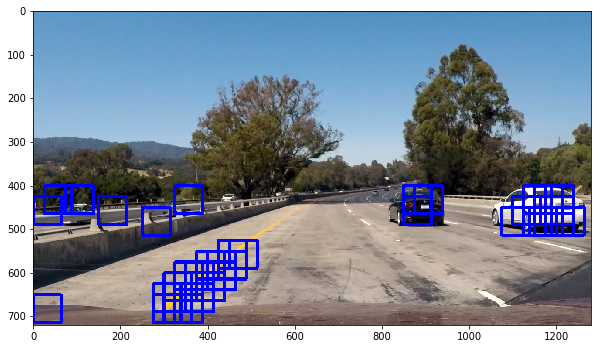

In [333]:
windows = slide_window(test_image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=xy_window, xy_overlap=xy_overlap)

hot_windows = search_windows(test_image, windows, clf, X_scaler, color_space=cspace, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(test_image.copy(), hot_windows, color=(255, 0, 0), thick=6)                    

fig = plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB));
fig.savefig('./output_images/test1_search_classify.png', dpi=fig.dpi)

### Multiple Detections

In [681]:
from vehicle_detection_utils import *
import cv2
# import glob
import time
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import pickle
import warnings

%matplotlib inline

#color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#orient = 9  # HOG orientations
#pix_per_cell = 8 # HOG pixels per cell
#cell_per_block = 2 # HOG cells per block
#hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
#spatial_size = (32, 32) # Spatial binning dimensions
#hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stops = [[400, 500],[420, 550],[450, 600],[480, None]] # Min and max in y to search in slide_window()
xy_windows = [(60,60),(70,70),(100,100),(130,130)]
xy_overlap = (0.6,0.6)
x_start_stops=[None, None]

test_files = './test_images/'
test_image = load_data(test_files,img_type = 'jpg')[0]
# load the svc classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = pickle.load( open("svc-clf.sav", "rb" ) )
    
clf = models[0].best_estimator_
X_scaler = models[1]
cspace = models[2]
spatial_size = models[3]
hist_bins = models[4]
hist_range = models[5]
orient = models[6]
pix_per_cell = models[7]
cell_per_block = models[8]
hog_channel = models[9]


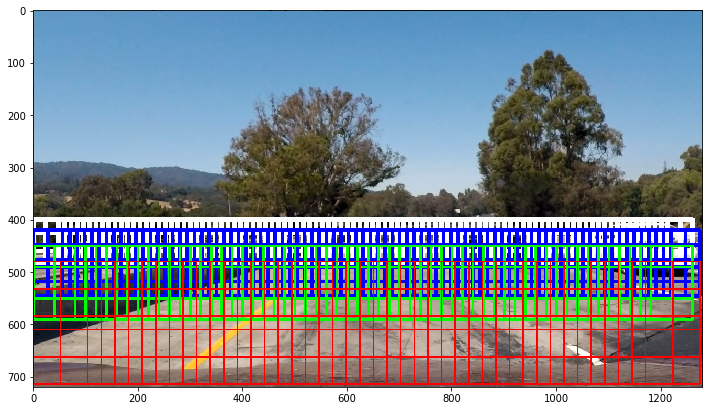

In [682]:
fig = plt.figure(figsize = (10,6))
windows = slide_window(test_image, x_start_stop, y_start_stops[0], xy_windows[0], xy_overlap)
                       
window_img = draw_boxes(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB), windows, color=(255, 255, 255), thick=8)                    

windows = slide_window(test_image, x_start_stop, y_start_stops[1], xy_windows[1], xy_overlap)
                       
window_img = draw_boxes(window_img, windows, color=(0, 0, 255), thick=6)

windows = slide_window(test_image, x_start_stop, y_start_stops[2], xy_windows[2], xy_overlap)
                       
window_img = draw_boxes(window_img, windows, color=(0, 255, 0), thick=4)

windows = slide_window(test_image, x_start_stop, y_start_stops[3], xy_windows[3], xy_overlap)
                       
window_img = draw_boxes(window_img, windows, color=(255, 0, 0), thick=2)

plt.imshow(window_img);

fig.tight_layout()
fig.savefig('./output_images/test1_multi_sliding_windows.png', dpi=fig.dpi)

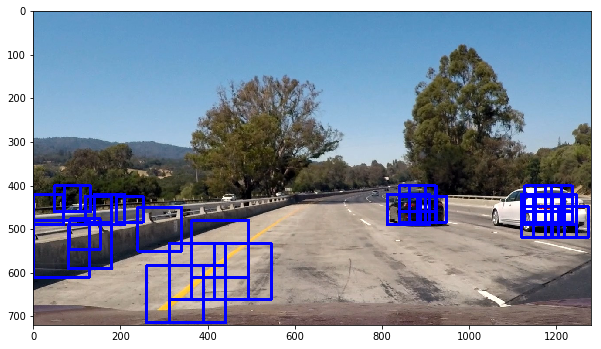

In [683]:
multi_hot_windows = []

for xy_window,y_start_stop in zip(xy_windows, y_start_stops):

    windows = slide_window(test_image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                        xy_window=xy_window, xy_overlap=xy_overlap)

    hot_windows = search_windows(test_image, windows, clf, X_scaler, color_space=cspace, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       
    multi_hot_windows+=hot_windows
    
window_img = draw_boxes(test_image.copy(), multi_hot_windows, color=(255, 0, 0), thick=6)                    

fig = plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB));
fig.savefig('./output_images/test1_multiscale_search_classify.png', dpi=fig.dpi)

### False Positives

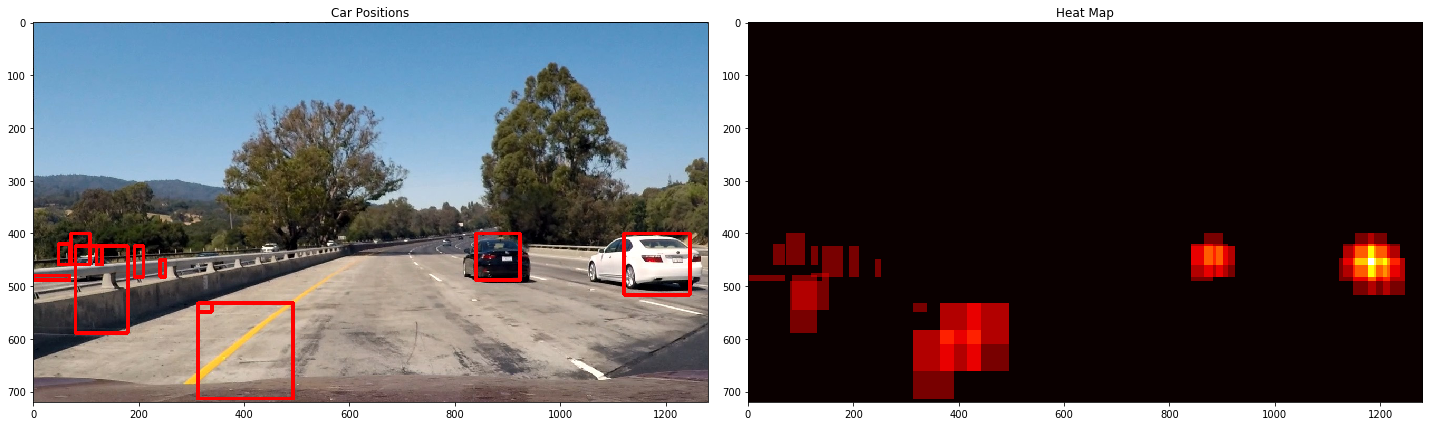

In [684]:
heat_thresh = 1

heat = np.zeros_like(window_img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,multi_hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,heat_thresh)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(test_image), labels)

fig = plt.figure(figsize=(20,6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
fig.savefig('./output_images/test1_multiple_detection.png', dpi=fig.dpi)

### Pipeline

In [691]:
from vehicle_detection_utils import *
import cv2
# import glob
import time
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import pickle
import warnings

%matplotlib inline

spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stops = [[400, 500],[420, 550],[450, 600],[480, None]] # Min and max in y to search in slide_window()
xy_windows = [(60,60),(70,70),(100,100),(130,130)]
xy_overlap = (0.6,0.6)

test_files = './test_images/'
test_images = load_data(test_files,img_type = 'jpg')
# load the svc classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = pickle.load( open("svc-clf.sav", "rb" ) )
    
clf = models[0].best_estimator_
X_scaler = models[1]
cspace = models[2]
spatial_size = models[3]
hist_bins = models[4]
hist_range = models[5]
orient = models[6]
pix_per_cell = models[7]
cell_per_block = models[8]
hog_channel = models[9]
heat_thresh = 1

In [692]:
def vehDetect(image, y_start_stops, xy_windows, xy_overlap, 
                     clf, X_scaler, cspace, spatial_size, hist_bins, orient, pix_per_cell, cell_per_block, hog_channel, 
                     spatial_feat = True, hist_feat = True, hog_feat = True, heat_thresh = 1, x_start_stop=[None, None]):
    '''
    the vehicle detection pipeline is implemented in this function
    '''
    multi_hot_windows = []

    for xy_window,y_start_stop in zip(xy_windows,y_start_stops):
        windows = slide_window(image, x_start_stop, y_start_stop=y_start_stop, 
                        xy_window=xy_window, xy_overlap=xy_overlap)

        hot_windows = search_windows(image, windows, clf, X_scaler, color_space=cspace, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
        multi_hot_windows+=hot_windows
    
    window_img = draw_boxes(image.copy(), multi_hot_windows, color=(255, 0, 0), thick=6)                    
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,multi_hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,heat_thresh)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return windows, hot_windows, window_img, heat, heatmap, labels, draw_img

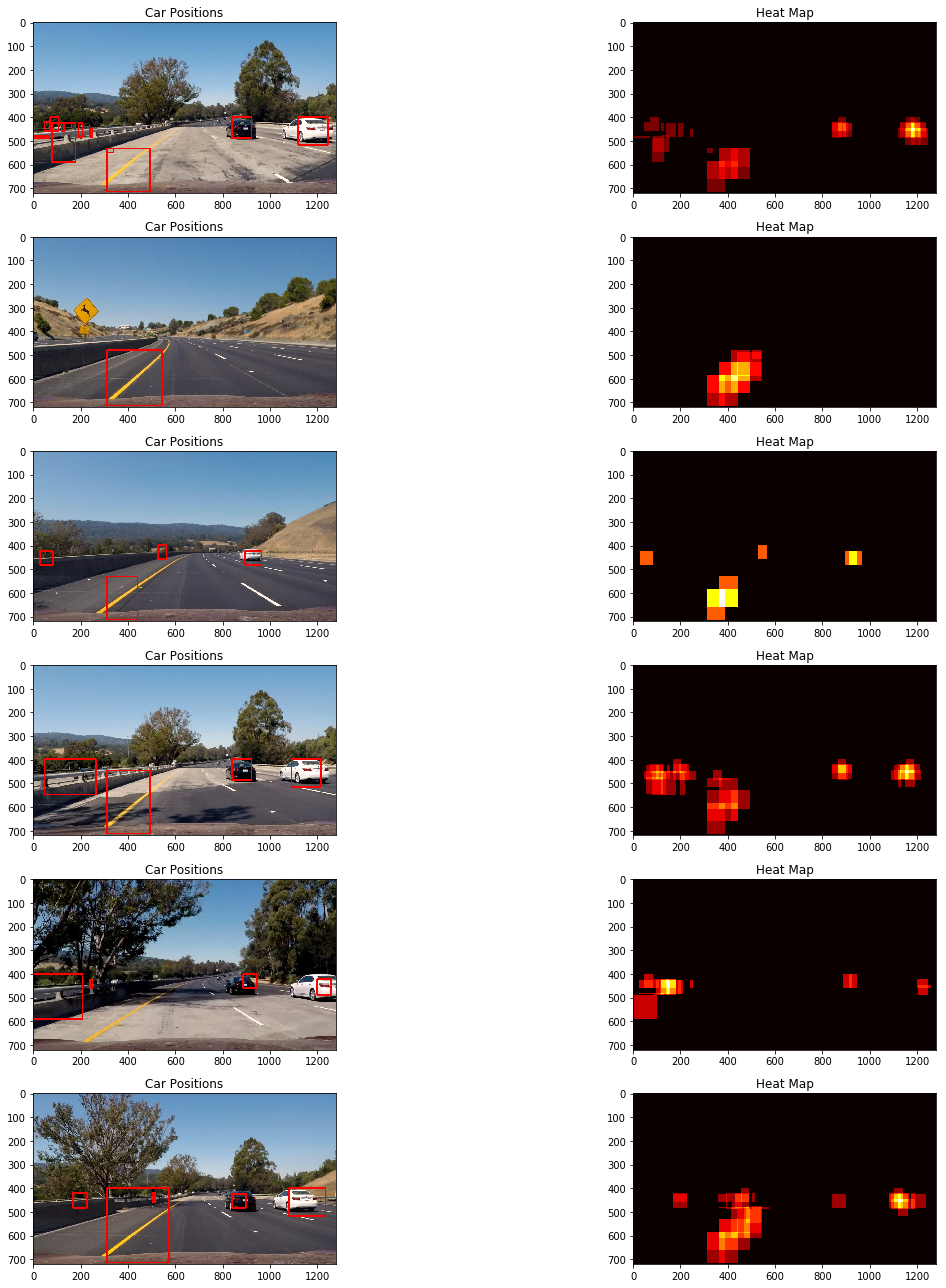

In [693]:
n_img = len(test_images)
fig = plt.figure(figsize=(20,3*n_img))
for i,test_image in enumerate(test_images):
    windows, hot_windows, window_img, heat, heatmap, labels, draw_img = vehDetect(image = test_image, y_start_stops = y_start_stops, 
                                                                                  xy_windows = xy_windows, xy_overlap = xy_overlap, 
                         clf = clf, X_scaler = X_scaler, cspace = cspace, spatial_size = spatial_size, hist_bins = hist_bins, 
                         orient = orient, pix_per_cell = pix_per_cell, cell_per_block = cell_per_block, hog_channel = hog_channel, 
                         spatial_feat = True, hist_feat = True, hog_feat = True, heat_thresh = heat_thresh, x_start_stop=[None, None])

    plt.subplot(n_img,2,i*2+1)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('Car Positions')
    plt.subplot(n_img,2,i*2+2)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
fig.tight_layout()
fig.savefig('./output_images/test1_pipeline.png', dpi=fig.dpi)